In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Problem 1: Geometric Brownian Motion

$$ dS_t = \mu S_tdt + \sigma S_t dW_t,  \\ S_0 = s_0$$

$$ S_t = S_0 \exp [(\mu - \sigma^2 /2)t + \sigma W_t] $$

In [75]:
n = 3650
mu = 0.06
sigma = 0.2
M = 10.0
s0 = 100.0

def exact_simulation(s0, mu, sigma, n):
    dt = 1.0/365.0 # frequency = delta = T/n where T = 1 year and n = 365 days
    dz = np.random.randn(n)*np.sqrt(dt)
    S = s0 * np.exp(np.cumsum((mu-(sigma**2)/2)*dt + sigma*dz))
    return S

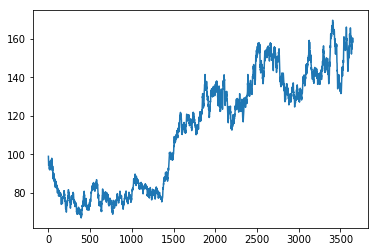

In [66]:
plt.plot(exact_simulation(s0, mu, sigma, n))
plt.show()

In [69]:
# daily continuously compounded returns: r_t = log(1 + R_t) 
prices_one_year = exact_simulation(s0, mu, sigma, n)
prices_one_year_lagged = np.diff(prices_one_year)
R_t = prices_one_year_lagged/prices_one_year[:-1]
r_t = np.log(1 + R_t)

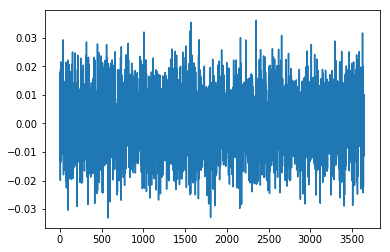

In [70]:
plt.plot(r_t)

In [74]:
dt = 1.0/365.0
annualised_mean = np.sum(r_t)*1/(n*dt)
annualised_std = np.sum((R_t - annualised_mean)**2)*(1/(n-1)*dt)
print(f"Annualised mean: {annualised_mean} \n")
print(f"Annualised std: {annualised_std}")

Annualised mean: 0.0644938387671052 

Annualised std: 1.1620525803977036e-05
